# Que-1
- In answering this quiz I have neither taken help from anyone nor helped anyone.  

# Que-2

## Part-(a)
In bayesian approach we treat parameters as random variables and in frequentist as fixed. Consequently, Bayesian approach gives us a full posterior distribution of parameter and freuentist in which there gives only point estimate of the parameter. When we study uncertainity in parameter we are better off with bayesian because we have whole distribution of the r.v. parameter. In bayesian approach we also condier prior information about parameters that we have but in frequentist approach we don't consider any prior info that we might have. 

## Part-(b)
95% HDI means that it is the shortest interval that contains 95% of the probability mass. It gives central interval of highest probability. It is unique statistics. On the other hand 95% CI means any interval that has 95% area covered under probability distribution. It is not unqiue statistics.

## Part-(c)
We can consider MAtropolish and Gibbs algo with multiple runs and then use avg samples from these runs. We also can run algos multiple times with different starting points. With good proposal dist we have better change of collecting effective samples of target dist.  

# Que-3

**Part-(a)**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

We can prove it:
$$E[X]=\int_{0}^{1} x f(x) dx$$
$$=\int_{0}^{1} x \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)}$$
$$=\frac{B(\alpha,\beta)}{B(\alpha,\beta)}\int_{0}^{1} \frac{x^{(\alpha+1)-1}(1-x)^{\beta-1}}{B((\alpha+1),\beta)}$$
Expand beta functions and use properties of gamma functions:
$$= \frac{\Gamma(\alpha+\beta)\Gamma(\alpha+1)}{\Gamma(\alpha+\beta+1)\Gamma(\alpha)}$$
$$=\frac{\alpha}{\alpha+\beta}$$

- So Beta mean is given as:
$$ E[X]=\frac{\alpha}{\alpha+\beta} $$

In [4]:
beta_mean=2/(2+5)
# it is shown as a vertical line

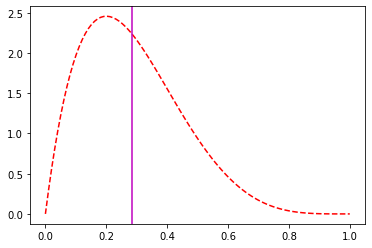

In [5]:
x = np.linspace(0, 1.0, 100)
y = beta.pdf(x, 2, 5)
plt.plot(x, y, "r--")
plt.axvline(x=beta_mean,c='m')

**Part-(b)**

No of heads = 3 and total tosses = 10.
That means $\sum_{n=1}^{10}=3$ and N = 10.\
bernoulli ditribution:
$$p(y_n|\theta)=\theta^{y_n}(1-\theta)^{1-y_n}$$
As all tosses are iid so we can write likelihood as:
$$ L(\theta|data)=\prod_{n=1}^{10} p(y_n|\theta)$$
SimpLyfy:
$$L(\theta|data)=\prod_{n=1}^{10} \theta^{y_n}(1-\theta)^{1-y_n}$$
$$=\theta^{\sum_{n=1}^{10} y_n}(1-\theta)^{10-\sum_{n=1}^{10} y_n} $$
Or we can write it in log form by taking log on both sides:
$$l(\theta|data)=\sum_{n=1}^{10}[y_n log \theta+(1-y_n)log (1-\theta)] $$

SOLVE for MLE:
We can differentiate above log-lik. to get MLE solution,
$$\frac{dl}{d\theta}=\frac{\sum_{n=1}^{10} y_n}{\theta}-\frac{\sum_{n=1}^{10}(1-y_n)}{1-\theta}$$
Set above to zero and we get,
$$\theta_{MLE}=\frac{\sum_{n=1}^{10}y_n}{10}$$

To check second order condition:
$$ \frac{d^{2}l}{d\theta^{2}}= -\frac{\sum_{n=1}^{10} y_n}{\theta^{2}}+\frac{\sum_{n=1}^{10}(1-y_n)}{(1-\theta)^{2}}$$
Put mle value and we get,
$$\frac{d^{2}l}{d\theta^{2}} < 0 $$
this solution is indeed maxima. So,
$$\theta_{MLE}=\frac{\sum_{n=1}^{10}y_n}{10}=\frac{3}{10}=0.3$$

**Part-(c)**

In [6]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy.stats as st
import seaborn as sns

$$post \propto \theta^{\sum_{n=1}^{10} y_n}(1-\theta)^{10-\sum_{n=1}^{10} y_n} \theta^{\alpha-1}(1-\theta)^{\beta-1}$$
$$post \propto \theta^{\sum_{n=1}^{10} + \alpha-1}(1-\theta)^{(10-\sum_{n=1}^{10} y_n + \beta)-1}$$
MAP can be calculated by differ. above objective function. Excat similar cal. are for MAP, as we did for MLE and we get,
$$\theta_{MAP}=\frac{\alpha + \sum_{n=1}^{10} y_n -1 }{\alpha + \beta+8}$$

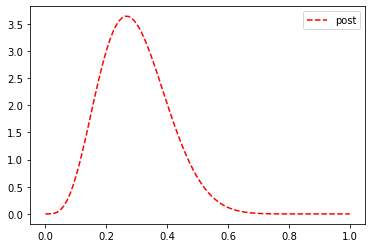

In [14]:
x = np.linspace(0, 1.0, 100)
y = beta.pdf(x, 5, 12)
plt.plot(x, y, "r--",label='post')
plt.legend()

In [21]:
def target(lik, prior, n, h, theta):
    if theta < 0 or theta > 1:
        return 0
    else:
        return lik(n, theta).pmf(h)*prior.pdf(theta)

n = 10
h = 3
a = 2
b = 5
lik = st.binom
prior = st.beta(a, b)
sigma = 0.3

naccept = 0
theta = 0.1
niters = 10000
samples = np.zeros(niters+1)
samples[0] = theta
for i in range(niters):
    theta_p = theta + st.norm(0, sigma).rvs()
    rho = min(1, target(lik, prior, n, h, theta_p)/target(lik, prior, n, h, theta ))
    u = np.random.uniform()
    if u < rho:
        naccept += 1
        theta = theta_p
    samples[i+1] = theta

/tmp/ipykernel_46562/2111944006.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(samples)


array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'x'}>]], dtype=object)

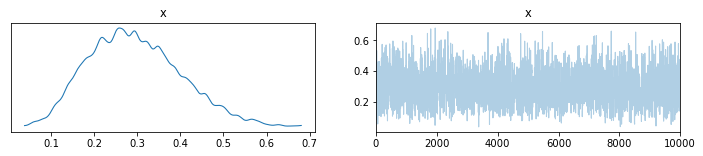

In [22]:
pm.traceplot(samples)

In [23]:
# trace MAP
np.mean(samples)

0.2956660333312629

**Part-(d)**

Full posterior can be computated as,
$$post = \frac{\frac{\theta^{\sum_{n=1}^{10} + \alpha-1}(1-\theta)^{(10-\sum_{n=1}^{10} y_n + \beta)-1}}{B(\alpha,\beta)}}{\int\frac{\theta^{\sum_{n=1}^{10} + \alpha-1}(1-\theta)^{(10-\sum_{n=1}^{10} y_n + \beta)-1}}{B(\alpha,\beta)}}$$
OR,
$$post = \frac{\theta^{\sum_{n=1}^{10} + \alpha-1}(1-\theta)^{(10-\sum_{n=1}^{10} y_n + \beta)-1}}{\int\theta^{\sum_{n=1}^{10} + \alpha-1}(1-\theta)^{(10-\sum_{n=1}^{10} y_n + \beta)-1}}$$
By multiplying appropriate Beta func we get post to be a beta distribution with,
$$\alpha_0=\alpha + \sum_{n=1}^{10} y_n=2+3=5$$
$$\beta_0=\beta+10-\sum_{n=1}^{10} y_n=5+7=12$$

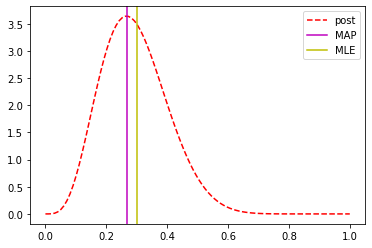

In [11]:
theta_map=4/15
theta_mle=3/10
x = np.linspace(0, 1.0, 100)
y = beta.pdf(x, 5, 12)
plt.plot(x, y, "r--",label='post')
plt.axvline(x=theta_map,c='m',label='MAP')
plt.axvline(x=theta_mle,c='y',label='MLE')
plt.legend()